# Term Project


### *Matt Danielson, Samuel Kaessner*


## Intro

For our project we worked on a dataset from the UCI machine learning repository to classify photos of faces. The photos were of different people with a number of variations in their poses including whether they wore sunglasses or not, the direction they were looking, and the emotion they were displaying. We decided to use a neural network to classify the images, with each pixel representing a weight into the hidden layer of the neural net. We shuffled the images and used 80% of them as training data, and withheld 20% to be used for test data.

The images were in PGM format, so the first thing we did was write a function to read the pixel data into an array where each array element was the grayscale value of that pixel.

In [1]:
import sys
import os
import re
import numpy as np
import neuralnetworksA4 as nn
import mlutilities as ml
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
''' Baseline code by cgohlke on StackOverflow, from this answer:
    https://stackoverflow.com/a/7369986
    Modified somewhat. 
'''
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """

    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5[\s\r\n]*"
            b"(\d+)[\s\r\n]*"
            b"(\d+)[\s\r\n]*"
            b"(\d+)[\s\r\n])", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            )

Next we decided to write some code that will walk through the directory of image files and read each file into an array which we will use with numpy called X
We also needed to establish some target values so for each value we created an array of target values called info. The first entry of info is a boolean 0 or 1, where 1 means the subject is wearing sunglasses.

The next entry of info is a number 0-3 to denote the direction the subject is looking, either left, right, straight, or up.

The final entry of info is an integer 0-3 that denotes the subject’s emotion, angry, happy, neutral, or sad.


In [157]:
''' 
Loads in PGM Data, by digging through the given directory. Num specifies which
attribute of the image to use as the target. This is given by:
1 - Direction
2 - Expression
3 - Sunglasses
Anything else - All 3 attributes
'''
def loadPGMData(rootDir, num, level):
    values = []
    targets = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        for fname in fileList:
            ending = str(level) + ".pgm"
                
            if(fname.endswith(ending)):
                values.append(read_pgm(os.path.join(dirName, fname)))
                
                if num is 1: # Direction
                    splits = fname.split("_")
                    fname = splits[1]
                elif num is 2: # Expression
                    splits = fname.split("_")
                    fname = splits[2]
                elif num is 3: # Sunglasses
                    splits = fname.split("_")
                    fname = splits[3]
                else:
                    fname = fname[fname.find("_") + 1:-4]
                targets.append(fname)
            
            
    X = np.asarray(values)
    T = np.asarray(targets).reshape((-1, 1))
    return ml.partition(X, T, 0.8, shuffle=True, classification=True)
        

An example of one of the images that we analyzed is here:

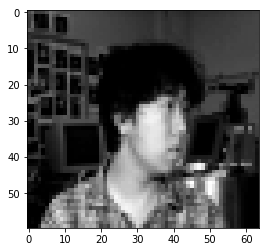

In [151]:
plt.imshow(read_pgm("faces/an2i/an2i_left_neutral_open_2.pgm").reshape((60, 64)),interpolation='nearest',cmap='gray')


Our predictions for the data was follows:

We predict that whether or not the subject is wearing sunglasses will be the easiest category to predict. This is because the sunglasses provide a great amount of contrast in the middle of the image, between the brighter colors of the face and the dark of the sunglasses, so we expect the pixels in the middle of the image will be weighted the most heavily as inputs to the neural net. Other pixels may not have much weight at all, as for each picture there is a dark background around the top and side edges of the image.

We expect that classifying the direction the subject is looking will be more difficult, as it will rely on a smaller set of pixels around the edge of the face to see, for example, which way their nose is pointing.

We think that the facial expression will be most difficult of all because it will rely on a very small set of pixels around the corners of the mouth.

The images also come in three resolutions. We expect that especially for the direction of the head and emotion, the higher resolution will be easier to classify. However, we predict that the sunglasses will actually go down with higher resolution because there will be more hidden values trying to determine the middle of the face instead of only a few heavy, dark pixels where the sunglasses are.




1.01812292922e-17


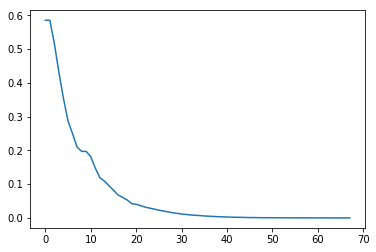

In [152]:
XTrain, TTrain, XTest, TTest = loadPGMData('faces', 1, 4)
neuralNet = nn.NeuralNetworkClassifier(XTrain.shape[1], [50, 50, 50], np.unique(np.squeeze(TTrain)).shape[0])
neuralNet.train(XTrain, TTrain, nIterations=1000, verbose=True)
plt.plot(neuralNet.getErrors())

We define a percent correct function to see how well our networks do. 

In [136]:
def percentCorrect(A, B):
    return np.sum(A == B) / len(B) * 100

In [153]:

PTrain = neuralNet.use(XTrain)
PTest = neuralNet.use(XTest)

print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(TTrain, PTrain)))
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(TTest, PTest)))



Training data: Percent Correct  100.00

Testing data: Percent Correct  96.77


We can see that the neural net predicted sunglasses very well!

Let's repeat this for each of the other attributes.

SCG: Iteration 100 fValue Eval 0.00571548736958 Scale 1e-15
SCG: Iteration 200 fValue Eval 6.94341482661e-06 Scale 1e-15
SCG: Iteration 300 fValue Eval 2.5067837132e-10 Scale 1e-15
1.69785958573e-16

Training data: Percent Correct  100.00

Testing data: Percent Correct  15.20


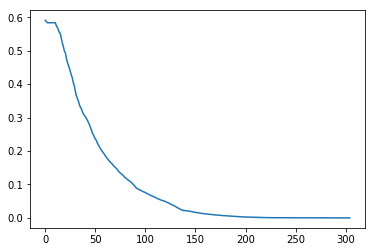

In [154]:
XTrain, TTrain, XTest, TTest = loadPGMData('faces', 2, 4)
neuralNet = nn.NeuralNetworkClassifier(XTrain.shape[1], [50, 50, 50], np.unique(np.squeeze(TTrain)).shape[0])
neuralNet.train(XTrain, TTrain, nIterations=1000, verbose=True)
plt.plot(neuralNet.getErrors())

PTrain = neuralNet.use(XTrain)
PTest = neuralNet.use(XTest)

print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(TTrain, PTrain)))
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(TTest, PTest)))

7.40069271851e-17

Training data: Percent Correct  100.00

Testing data: Percent Correct  97.60


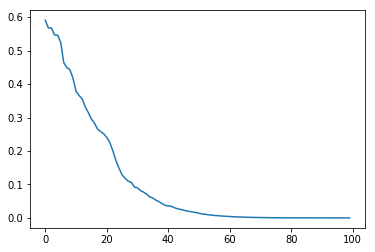

In [139]:
XTrain, TTrain, XTest, TTest = loadPGMData('faces', 3, 4)
neuralNet = nn.NeuralNetworkClassifier(XTrain.shape[1], [50, 50, 50], np.unique(np.squeeze(TTrain)).shape[0])
neuralNet.train(XTrain, TTrain, nIterations=1000, verbose=True)
plt.plot(neuralNet.getErrors())

PTrain = neuralNet.use(XTrain)
PTest = neuralNet.use(XTest)

print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(TTrain, PTrain)))
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(TTest, PTest)))

In [140]:
def testResolution(targetVariable, level):
    XTrain, TTrain, XTest, TTest = loadPGMData('faces', targetVariable, level)
    neuralNet = nn.NeuralNetworkClassifier(XTrain.shape[1], [50, 50, 50], np.unique(np.squeeze(TTrain)).shape[0])
    neuralNet.train(XTrain, TTrain, nIterations=1000, verbose=True)
    plt.plot(neuralNet.getErrors())

    PTrain = neuralNet.use(XTrain)
    PTest = neuralNet.use(XTest)

    print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(TTrain, PTrain)))
    print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(TTest, PTest)))

1.9383521988e-16

Training data: Percent Correct  100.00

Testing data: Percent Correct  95.16


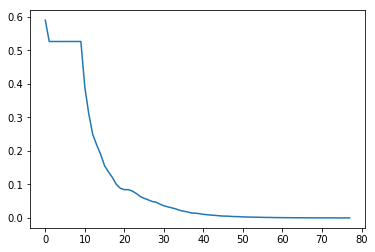

In [145]:
testResolution(1, 2)

SCG: Iteration 100 fValue Eval 0.0109374319124 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.000405702182886 Scale 1e-15
SCG: Iteration 300 fValue Eval 4.46225153918e-05 Scale 1e-15
SCG: Iteration 400 fValue Eval 1.98821240047e-06 Scale 1e-15
SCG: Iteration 500 fValue Eval 7.14809755706e-08 Scale 1e-15
SCG: Iteration 600 fValue Eval 1.99051218427e-09 Scale 1e-15
1.8701292396e-16

Training data: Percent Correct  100.00

Testing data: Percent Correct  9.60


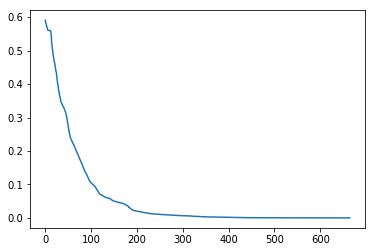

In [143]:
testResolution(2, 2)

1.41925930934e-16

Training data: Percent Correct  100.00

Testing data: Percent Correct  96.00


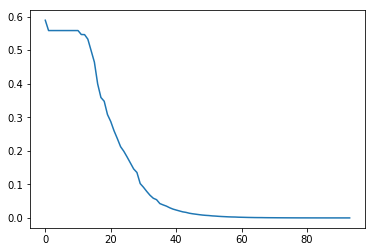

In [144]:
testResolution(3, 2)

## Conclusion
Using our neural network approach, we were able to classify image data of faces with a varying degree of accuracy based on what the attribute was. Big, obvious differences like wearing sunglasses were easier to classify than subtler features like emotion. Some applications for this type of machine learning could be facial recognition software, security cameras, or programs that can describe the world to someone who is visually impaired.
